# Regression: Bluebook Bulldozer Price using RandomForest Regressor

**[EN]**  
In this project, I tested how well bulldozer prices might be predicted using machine learning.

Because we'll utilize the Randomforest Regressor algorithm to calculate or forecast a value in numerical form, this project involves a regression problem.

**[ID]**  
Pada projek ini saya melakukan sebuah eksperimen dengan menggunakan machine learning untuk memprediksi harga dari bulldozers. 

Dengan demikian projek ini masuk kedalam permasalahan regresi, karena kita akan menentukan atau memperdiksi sebuah nilai dalam bentuk numerik dengan menggunakan algoritma Randomforest Regressor.

# Problem Definition

**[EN]**  
How well can we predict the future sale price of a bulldozer, given its characteristics previous examples of how much similar bulldozers have been sold for?

**[ID]**  
Seberapa baik kita dapat memprediksi harga jual bulldozer di masa depan, mengingat karakteristiknya contoh sebelumnya berapa banyak bulldoser serupa yang telah dijual?

# Data

**[EN]**  
You can see it's a time series problem by looking at the [dataset from Kaggle](https://www.kaggle.com/c/bluebook-for-bulldozers/data). This indicates that the dataset has a time attribute.
In this instance, the relevant information is bulldozer sales history. include information on the model kind, size, sale date, and more.
Three datasets are present:
1. **Train.csv** - Historical bulldozer sales examples from the year 2000 to 2011 (almost 400,000 examples with more than 50 variables, including the **target variable** "SalePrice").
2. **Valid.csv** - Historical bulldozer sales samples from January 1 2012 to April 30 2012. This file contains about 12,000 examples with the same characteristics as **Train.csv**.
3. **Test.csv** - Historical bulldozer sales samples from May 1, 2012, to November 2012 (almost 12,000 examples; the 'SalePrice' variable is absent because this is what we'll be attempting to forecast).

**[ID]**  
Berdasarkan dataset yang digunakan, diketahui bahwa dataset berupa timeseries [dataset dari Kaggle] (https://www.kaggle.com/c/bluebook-for-bulldozers/data). Ini menunjukkan bahwa dataset memiliki atribut waktu.
Dalam kasus ini, informasi yang relevan adalah riwayat penjualan bulldozer. termasuk informasi tentang jenis model, ukuran, tanggal penjualan, dan banyak lagi.
Ada tiga dataset yang hadir:
1. **Train.csv** - Contoh penjualan bulldozer bersejarah dari tahun 2000 hingga 2011 (hampir 400.000 contoh dengan lebih dari 50 variabel, termasuk variabel **target** "SalePrice").
2. **Valid.csv** - Sampel penjualan bulldozer bersejarah dari 1 Januari 2012 hingga 30 April 2012. File ini berisi sekitar 12.000 contoh dengan karakteristik yang sama dengan **Train.csv**.
3. **Test.csv** - Sampel penjualan bulldozer bersejarah dari 1 Mei 2012, hingga November 2012 (hampir 12.000 contoh; variabel 'SalePrice' tidak ada karena ini adalah apa yang akan kami coba memprediksi).

# Evaluation
**[EN]**  
Root mean squared log error (RMSLE) has been chosen by Kaggle as the evaluation statistic for this particular issue. (https://www.kaggle.com/c/bluebook-for-bulldozers/overview/evaluation). The objective will be to reduce this value as much as feasible, as is the case with many regression analyses.

We'll compute the RMSLE and then compare our results to others on the [Kaggle leaderboard](https://www.kaggle.com/c/bluebook-for-bulldozers/leaderboard) to see how well our model is performing.

**[ID]**  
Root mean squared log error (RMSLE) telah dipilih oleh Kaggle sebagai statistik evaluasi untuk masalah ini. (https://www.kaggle.com/c/bluebook-for-bulldozers/overview/evaluation). Tujuannya adalah untuk mengurangi nilai ini sebanyak mungkin, seperti yang terjadi dengan banyak analisis regresi.

Kami akan menghitung RMSLE dan kemudian membandingkan hasil kami dengan yang lain di [Kaggle leaderboard] (https://www.kaggle.com/c/bluebook-for-bulldozers/leaderboard) untuk melihat seberapa baik model tersebut menghasilkan prediksi.



# Features / Fitur
**[EN]**  
Different elements of the data are called features. You should start learning as much as you can about the data throughout this step.


To accomplish this, one of the most popular methods is to build a **data dictionary**.


Kaggle offers a data dictionary for this dataset that describes what each attribute in the dataset implies. From the Kaggle competition page, you can [immediately download this file]. (account required) or view it on Google Sheets. (https://www.kaggle.com/c/bluebook-for-bulldozers/download/Bnl6RAHA0enbg0UfAvGA%2Fversions%2FwBG4f35Q8mAbfkzwCeZn%2Ffiles%20Data%20Dictionary.xlsx)


Now that you are aware of everything, let's get going!


We'll import the dataset first, then we'll start investigating. Building a baseline model and comparing it to the competition will be our first objective because we are aware of the assessment measure we're seeking to minimize.

**[ID]**  
Elemen-elemen yang berbeda dari data disebut fitur. Anda harus mulai mempelajari sebanyak mungkin tentang data selama langkah ini.


Untuk mencapai ini, salah satu metode yang paling populer adalah membangun kamus **data**.


Kaggle menawarkan kamus data untuk dataset ini yang menggambarkan apa yang diartikan oleh setiap atribut dalam dataset. Dari halaman persaingan Kaggle, Anda dapat [mengunduh file ini segera]. (akun diperlukan) atau menontonnya di Google Sheets. (https://www.kaggle.com/c/bluebook-for-bulldozers/download/Bnl6RAHA0enbg0UfAvGA%2Fversions%3FwBG4f35Q8mAbfkzwCeZn%4Ffiles%10Data%20Dictionary.xlsx)


## Import Library

In [62]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

# traintest split
from sklearn.model_selection import train_test_split, cross_val_score

# Preprocessing
import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# ML algorithm
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Evaluation Metric
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

import warnings
warnings.filterwarnings('ignore')

## Load Dataset

In [3]:
df = pd.read_csv("TrainAndValid.csv",
                 low_memory=False,
                 parse_dates=["saledate"])

In [5]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   SalesID                   412698 non-null  int64         
 1   SalePrice                 412698 non-null  float64       
 2   MachineID                 412698 non-null  int64         
 3   ModelID                   412698 non-null  int64         
 4   datasource                412698 non-null  int64         
 5   auctioneerID              392562 non-null  float64       
 6   YearMade                  412698 non-null  int64         
 7   MachineHoursCurrentMeter  147504 non-null  float64       
 8   UsageBand                 73670 non-null   object        
 9   saledate                  412698 non-null  datetime64[ns]
 10  fiModelDesc               412698 non-null  object        
 11  fiBaseModel               412698 non-null  object        
 12  fi

Berdasarkan informasi diatas, mayoritas fitur / variabel memiliki tipe data object sehingga kedepannya dalam membuat sebuah model, perlu dilakukan manipulasi data dengan mengubah seluruh tipe data menjadi numerik.

Jika dilihat secara sekilas terdapat banyak fitur / variabel yang memiliki missing values.

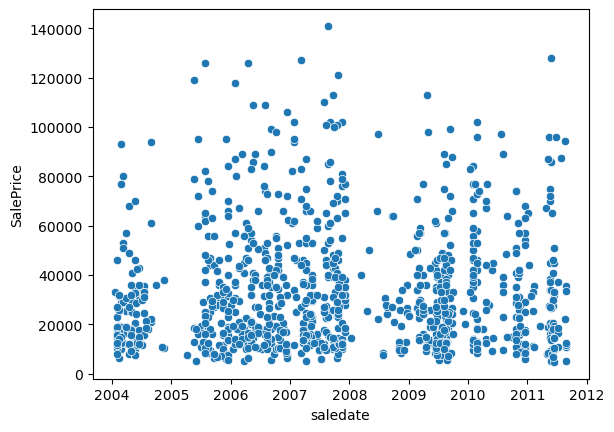

In [10]:
sns.scatterplot(data=df[:1000], x='saledate', y='SalePrice');

In [11]:
df.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3.0,3.0,3.0,3.0,3.0
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


Karena dataset yang digunakan merupakan timeseries, maka untuk mempermudah melakukan analisa singkat data ini akan diurutkan berdasarkan waktu.

In [13]:
df = df.sort_values(by=["saledate"], ascending=True)
df.saledate.head(15)

205615   1989-01-17
233186   1989-01-31
142491   1989-01-31
115536   1989-01-31
92301    1989-01-31
115892   1989-01-31
134080   1989-01-31
92294    1989-01-31
31494    1989-01-31
140922   1989-01-31
66337    1989-01-31
92531    1989-01-31
82122    1989-01-31
92256    1989-01-31
145670   1989-01-31
Name: saledate, dtype: datetime64[ns]

In [14]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

Banyak sekali missing values pada dataset.

### Menambah kolom tahun dan bulan

In [16]:
# sebelum kita melakukan manipulasi terhadap data, alangkah baiknya untuk membuat copy data
df_copy = df.copy()

In [17]:
df_copy["saleYear"] = df_copy.saledate.dt.year
df_copy["saleMonth"] = df_copy.saledate.dt.month

## Top 10 States dengan penjualan Bulldozer tertinggi

In [20]:
df_copy['state'].value_counts().head(10)

Florida        67320
Texas          53110
California     29761
Washington     16222
Georgia        14633
Maryland       13322
Mississippi    13240
Ohio           12369
Illinois       11540
Colorado       11529
Name: state, dtype: int64

## Convert Tipe data string / object ke Category

Dalam melakukan manipulasi data, untuk mengubah tipe data string / object menjadi category terdapat syarat dimana tidak boleh terdapat missing values di dalam tipe data string / object.

Sehingga untuk mengubah tipe data string menjadi category dapat menggunakan pandas types API (https://pandas.pydata.org/pandas-docs/stable/reference/general_utility_functions.html#data-types-related-functionality) yang dapat digunakan untuk memanipulasi tipe data.

In [22]:
# Kolom / Fitur dengan tipe data object / string
for label, content in df_copy.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [24]:
# convert menjadi tipe data category
for label, content in df_copy.items():
    if pd.api.types.is_string_dtype(content):
        df_copy[label] = content.astype("category").cat.as_ordered()

In [25]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 55 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   SalesID                   412698 non-null  int64         
 1   SalePrice                 412698 non-null  float64       
 2   MachineID                 412698 non-null  int64         
 3   ModelID                   412698 non-null  int64         
 4   datasource                412698 non-null  int64         
 5   auctioneerID              392562 non-null  float64       
 6   YearMade                  412698 non-null  int64         
 7   MachineHoursCurrentMeter  147504 non-null  float64       
 8   UsageBand                 73670 non-null   category      
 9   saledate                  412698 non-null  datetime64[ns]
 10  fiModelDesc               412698 non-null  category      
 11  fiBaseModel               412698 non-null  category      
 1

Penggunaan tipe data category akan memudahkan dalam proses selanjutnya dimana akan dilakukan konversi menjadi tipe data numerik untuk dilakukan proses modeling.

In [28]:
display(df_copy.state.cat.categories,df_copy.state.cat.codes)


Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

205615    43
233186     8
142491     8
115536     8
92301      8
          ..
409901     4
405777     4
411889     4
411890     4
409203     4
Length: 412698, dtype: int8

## Fill missing values

In [29]:
df_copy.isna().sum()/len(df_copy)*100

SalesID                      0.000000
SalePrice                    0.000000
MachineID                    0.000000
ModelID                      0.000000
datasource                   0.000000
auctioneerID                 4.879113
YearMade                     0.000000
MachineHoursCurrentMeter    64.258610
UsageBand                   82.149174
saledate                     0.000000
fiModelDesc                  0.000000
fiBaseModel                  0.000000
fiSecondaryDesc             34.099269
fiModelSeries               85.784520
fiModelDescriptor           81.871490
ProductSize                 52.485110
fiProductClassDesc           0.000000
state                        0.000000
ProductGroup                 0.000000
ProductGroupDesc             0.000000
Drive_System                74.051970
Enclosure                    0.080931
Forks                       52.092087
Pad_Type                    80.349796
Ride_Control                62.992794
Stick                       80.349796
Transmission

In [36]:
df_copy.to_csv('df_copy.csv', index=False)

### Fill Numerical Missing Values
untuk mengisi missing values dari kolom kolom numerik akan dilakukan dengan mengisinya dengan nilai median.

In [31]:
for label, content in df_copy.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)
        
# dibawah merupakan kolom yang memiliki tipe data numerik

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleYear
saleMonth


In [35]:
for label, content in df_copy.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

# dibawah merupakan kolom dengan tipe data numerik yang memiliki missing values

auctioneerID
MachineHoursCurrentMeter


In [38]:
# Fill numeric rows with the median
for label, content in df_copy.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # Add a binary column which tells if the data was missing our not
            df_copy[label+"_is_missing"] = pd.isnull(content)
            # Fill missing numeric values with median since it's more robust than the mean
            df_copy[label] = content.fillna(content.median())

In [39]:
for label, content in df_copy.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

In [44]:
display(df_copy.auctioneerID_is_missing.value_counts(), df_copy.MachineHoursCurrentMeter_is_missing.value_counts())

False    392562
True      20136
Name: auctioneerID_is_missing, dtype: int64

True     265194
False    147504
Name: MachineHoursCurrentMeter_is_missing, dtype: int64

In [48]:
df_copy.isna().sum()/len(df_copy)*100

SalesID                                 0.000000
SalePrice                               0.000000
MachineID                               0.000000
ModelID                                 0.000000
datasource                              0.000000
auctioneerID                            0.000000
YearMade                                0.000000
MachineHoursCurrentMeter                0.000000
UsageBand                              82.149174
saledate                                0.000000
fiModelDesc                             0.000000
fiBaseModel                             0.000000
fiSecondaryDesc                        34.099269
fiModelSeries                          85.784520
fiModelDescriptor                      81.871490
ProductSize                            52.485110
fiProductClassDesc                      0.000000
state                                   0.000000
ProductGroup                            0.000000
ProductGroupDesc                        0.000000
Drive_System        

Tinggal mengisi missing values pada tipe data category.

Namun karena jumlah missing values sangat banyak dan mayoritas diatas 50% dari total data, maka nilai missing values akan tetap dibiarkan.

Karena tipe data sudah berbentuk kategorikal, dan jika kita mengambil code category dari masing masing tipe data akan berubah sendirinya menjadi numerik yang merepresentasikan data kategorikal tersebut.

Pada pandas tipe data category, code data missing akan di konversikan menjadi nilai -1. sedangkan data lainnya akan dikonversikan menjadi data numerik yang dimulai dari 1 hingga jumlah unik dari keseluruhan data.

In [49]:
# Check columns which *aren't* numeric
for label, content in df_copy.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

UsageBand
saledate
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [51]:
# Turn categorical variables into numbers
for label, content in df_copy.items():
    # Check columns which *aren't* numeric
    if not pd.api.types.is_numeric_dtype(content):
        # Add binary column to inidicate whether sample had missing value
        df_copy[label+"_is_missing"] = pd.isnull(content)
        # We add the +1 because pandas encodes missing categories as -1
        df_copy[label] = pd.Categorical(content).codes+1
        
# codes+1, digunakan agar seluruh tipe data bernilai positif, karena seperti yang diketahui bahwa tipe data NAN akan dikonversikan menjadi -1 secara default berdasarkan pandas category

In [53]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Columns: 102 entries, SalesID to Steering_Controls_is_missing
dtypes: bool(47), float64(3), int16(5), int64(7), int8(40)
memory usage: 72.8 MB


In [60]:
df_copy.isna().sum().head(60)

SalesID                                0
SalePrice                              0
MachineID                              0
ModelID                                0
datasource                             0
auctioneerID                           0
YearMade                               0
MachineHoursCurrentMeter               0
UsageBand                              0
saledate                               0
fiModelDesc                            0
fiBaseModel                            0
fiSecondaryDesc                        0
fiModelSeries                          0
fiModelDescriptor                      0
ProductSize                            0
fiProductClassDesc                     0
state                                  0
ProductGroup                           0
ProductGroupDesc                       0
Drive_System                           0
Enclosure                              0
Forks                                  0
Pad_Type                               0
Ride_Control    

Keseluruhan data sudah di manipulasikan, sehingga nilai missing value pun sudah tidak terdeteksi.

# Modeling

For this competition, you are predicting the sale price of bulldozers sold at auctions.

The data for this competition is split into three parts:

- Train.csv is the training set, which contains data through the end of 2011.
- Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboard.
- Test.csv is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your score on the test set determines your final rank for the competition.


Algoritma yang akan digunakan pada permasalahan regresi ini adalah RandomForest Regressor.

## Train and Validation Split

In [67]:
df_val = df_copy[df_copy.saleYear == 2012]
df_train = df_copy[df_copy.saleYear != 2012]

len(df_val), len(df_train)

(11573, 401125)

In [68]:
X_train, y_train = df_train.drop("SalePrice", axis=1), df_train.SalePrice
X_valid, y_valid = df_val.drop("SalePrice", axis=1), df_val.SalePrice

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((401125, 101), (401125,), (11573, 101), (11573,))

Berdasarkan link kaggle diatas, Evaluation Metrics yang digunakan adalah `RMSLE`.

In [69]:
# Create evaluation function (the competition uses Root Mean Square Log Error)
from sklearn.metrics import mean_squared_log_error, mean_absolute_error

def rmsle(y_test, y_preds):
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

# Create function to evaluate our model
def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_valid)
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
              "Valid MAE": mean_absolute_error(y_valid, val_preds),
              "Training RMSLE": rmsle(y_train, train_preds),
              "Valid RMSLE": rmsle(y_valid, val_preds),
              "Training R^2": model.score(X_train, y_train),
              "Valid R^2": model.score(X_valid, y_valid)}
    return scores

In [81]:
# Change max samples in RandomForestRegressor
model = RandomForestRegressor(n_jobs=-1,
                              max_samples=10000, random_state=42)

In [82]:
%%time
# Cutting down the max number of samples each tree can see improves training time
model.fit(X_train, y_train)

CPU times: total: 39 s
Wall time: 3.86 s


RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [83]:
show_scores(model)

{'Training MAE': 5388.106207117482,
 'Valid MAE': 7161.415261384256,
 'Training RMSLE': 0.2519312115613912,
 'Valid RMSLE': 0.29550067201946045,
 'Training R^2': 0.8674855564115453,
 'Valid R^2': 0.8347335502456725}

## Hyperparameter Tuning

In [99]:
%%time
from sklearn.model_selection import RandomizedSearchCV

# Different RandomForestClassifier hyperparameters
param = {"n_estimators": np.arange(10, 100, 10),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [0.5, 1, "sqrt", "auto"],
           "max_samples": [10000],
           "random_state": [42]}

rs_model = RandomizedSearchCV(RandomForestRegressor(),
                              param_distributions=param,
                              n_iter=100,
                              cv=5,
                              verbose=True)

rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
CPU times: total: 19min 50s
Wall time: 19min 50s


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90]),
                                        'random_state': [42]},
                   verbose=True)

In [100]:
# Find the best parameters from the RandomizedSearch 
rs_model.best_params_

{'random_state': 42,
 'n_estimators': 40,
 'min_samples_split': 8,
 'min_samples_leaf': 3,
 'max_samples': 10000,
 'max_features': 0.5,
 'max_depth': None}

In [103]:
show_scores(model)

{'Training MAE': 5388.106207117482,
 'Valid MAE': 7161.415261384256,
 'Training RMSLE': 0.2519312115613912,
 'Valid RMSLE': 0.29550067201946045,
 'Training R^2': 0.8674855564115453,
 'Valid R^2': 0.8347335502456725}

### Compare before and after hyperparameter

In [110]:
%%time
# Best hyperparameters
tuning_param = RandomForestRegressor(n_estimators=40,
                                    min_samples_leaf=3,
                                    max_features=0.5,
                                    n_jobs=-1)
tuning_param.fit(X_train, y_train)

CPU times: total: 4min 14s
Wall time: 24.2 s


RandomForestRegressor(max_features=0.5, min_samples_leaf=3, n_estimators=40,
                      n_jobs=-1)

In [111]:
# After Hyperparameter Tuning
show_scores(tuning_param)

{'Training MAE': 2550.0147074433585,
 'Valid MAE': 5875.45499771486,
 'Training RMSLE': 0.13014158581749857,
 'Valid RMSLE': 0.24141814141899606,
 'Training R^2': 0.9670500251659957,
 'Valid R^2': 0.8837007496274224}

In [112]:
# Before Hyperparameter Tuning
show_scores(model)

{'Training MAE': 5388.106207117482,
 'Valid MAE': 7161.415261384256,
 'Training RMSLE': 0.2519312115613912,
 'Valid RMSLE': 0.29550067201946045,
 'Training R^2': 0.8674855564115453,
 'Valid R^2': 0.8347335502456725}

Jika diperhatikan pada evaluation metric dengan menggunakan `RMSLE` terjadi penurunan tingkat error pada data training dan juga validation.

Pada data training terjadi penurunan tingkat `RMSLE` dari 0.25 menjadi 0.13, dan pada data validation terjadi penurunan tingkat `RMSLE` dari 0.29 menjadi 0.24.

## Make prediction

In [115]:
df_test = pd.read_csv("Test.csv", parse_dates=["saledate"])

In [116]:
df_test

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12452,6643171,2558317,21450,149,2,2008,NaN,NaN,2012-10-24,80NX3,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
12453,6643173,2558332,21434,149,2,2005,NaN,NaN,2012-10-24,28N,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
12454,6643184,2558342,21437,149,2,1000,NaN,NaN,2012-10-24,35N,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
12455,6643186,2558343,21437,149,2,2006,NaN,NaN,2012-10-24,35N,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN


jika dilihat pada data diatas, untuk melakukan eksperimen diperlukan manipulasi data kembali seperti apa yang telah dilakukan pada data Train dan Validation sebelumnya. sehingga pada tahapan selanjutnya akan dilakukan preprocessing kembali untuk memanipulasi data.

In [117]:
def preprocess_data(df):
    # Add datetime parameters for saledate
    df["saleYear"] = df.saledate.dt.year
    df["saleMonth"] = df.saledate.dt.month
    
    # Fill numeric rows with the median
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                df[label+"_is_missing"] = pd.isnull(content)
                df[label] = content.fillna(content.median())
                
        # Turn categorical variables into numbers
        if not pd.api.types.is_numeric_dtype(content):
            df[label+"_is_missing"] = pd.isnull(content)
            # We add the +1 because pandas encodes missing categories as -1
            df[label] = pd.Categorical(content).codes+1        
    
    return df

In [118]:
df_test = preprocess_data(df_test)
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,3,499,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,9,831,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,9,1177,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,9,287,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,9,566,...,True,True,True,True,True,False,False,False,True,True


In [119]:
X_train.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
205615,1646770,1126363,8434,132,18.0,1974,0.0,0,1,4593,...,True,True,True,True,True,False,False,False,True,True
233186,1728883,1523610,9105,132,99.0,1986,0.0,0,2,4772,...,True,True,True,True,True,True,True,True,True,True
142491,1508502,1153157,4138,132,99.0,1972,0.0,0,2,2347,...,True,True,True,True,True,False,False,False,True,True
115536,1452578,1544443,3854,132,99.0,1974,0.0,0,2,1767,...,True,True,True,True,True,True,True,True,False,False
92301,1403418,1390168,7110,132,99.0,1986,0.0,0,2,744,...,True,True,True,True,True,True,True,True,True,True


jika diperhatikan pada kedua data diatas, pada data test setelah dilakukan preprocessing data terdapat 100 kolom sedangkan pada data X_train terdapat 101 kolom. Sehingga kedua kolom perlu di sinkronisasikan.

In [120]:
set(X_train.columns) - set(df_test.columns)

{'auctioneerID_is_missing'}

In [121]:
# Match test dataset columns to training dataset
df_test["auctioneerID_is_missing"] = False
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing,auctioneerID_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,3,499,...,True,True,True,True,True,True,True,True,True,False
1,1227844,1022817,7271,121,3,1000,28555.0,1,9,831,...,True,True,True,True,True,True,True,False,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,9,1177,...,False,False,False,False,True,True,True,True,True,False
3,1227848,56204,1269,121,3,2006,8940.0,1,9,287,...,False,False,False,False,True,True,True,True,True,False
4,1227863,1053887,22312,121,3,2005,2286.0,2,9,566,...,True,True,True,True,False,False,False,True,True,False


Sekarang data df_test sudah sesuai dengan data pada X_training, langkah selanjutnya adalah membuat prediksi dengan menggunakan model terbaik yang telah diperoleh berdasarkan hyperparameter tuning.

In [123]:
# Make predictions on the test dataset using the best model
test_preds = tuning_param.predict(df_test)

In [125]:
pd.DataFrame(test_preds)

,0
0,27607.713294
1,19408.341403
2,75693.207973
3,75077.165855
4,49151.694902
...,...
12452,51836.461490
12453,20954.239854
12454,18062.711310
12455,25859.262175


In [132]:
# Create DataFrame compatible with Kaggle submission requirements
df_preds = pd.DataFrame()
df_preds["SalesID"] = df_test["SalesID"]
df_preds["SalePrice_Pred"] = test_preds
df_preds

,SalesID,SalePrice_Pred
0,1227829,27607.713294
1,1227844,19408.341403
2,1227847,75693.207973
3,1227848,75077.165855
4,1227863,49151.694902
...,...,...
12452,6643171,51836.461490
12453,6643173,20954.239854
12454,6643184,18062.711310
12455,6643186,25859.262175


In [127]:
df_preds.to_csv('bulldozer_prediction.csv', index=False)

# Feature Importance

In [138]:
tuning_param.feature_importances_

array([3.24729156e-02, 2.22461770e-02, 4.34721081e-02, 1.06013526e-03,
       3.85758646e-03, 1.95570705e-01, 3.04600294e-03, 1.17408633e-03,
       6.46470358e-02, 3.70772006e-02, 4.71580246e-02, 7.10199454e-02,
       4.76602891e-03, 2.41384834e-02, 1.50408803e-01, 4.33721094e-02,
       7.53253814e-03, 2.31666307e-03, 4.83812147e-03, 3.34186802e-03,
       6.99413156e-02, 4.07408385e-04, 5.70224645e-05, 8.48508429e-04,
       2.49578214e-04, 1.39263862e-03, 1.11664171e-04, 9.23185748e-04,
       8.37207904e-03, 8.24532271e-04, 2.59401338e-03, 2.02339388e-03,
       4.09701479e-03, 3.99100098e-03, 6.06332332e-04, 1.15519207e-03,
       9.07934407e-03, 9.44997775e-04, 1.62109271e-02, 8.05545994e-04,
       1.20307167e-03, 5.45646415e-04, 1.22778331e-03, 1.79856642e-03,
       5.81874385e-04, 4.39622649e-04, 3.53743046e-04, 2.70058262e-04,
       2.47406668e-03, 9.18468462e-04, 2.44335295e-04, 2.31792480e-04,
       2.59631697e-02, 6.57274652e-03, 1.90729085e-04, 8.71646250e-04,
      

In [139]:
import seaborn as sns

# Helper function for plotting feature importance
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns,
                        "feature_importance": importances})
          .sort_values("feature_importance", ascending=False)
          .reset_index(drop=True))
    
    sns.barplot(x="feature_importance",
                y="features",
                data=df[:n],
                orient="h")

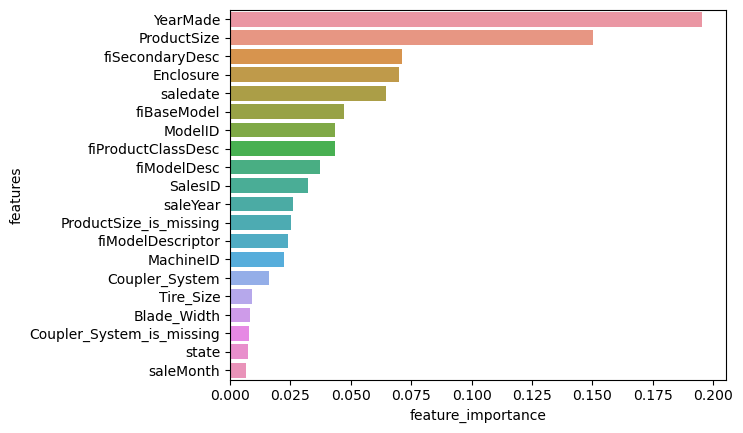

In [141]:
plot_features(X_train.columns, tuning_param.feature_importances_)

# Kesimpulan

- Jadi, projek ini telah menghasilkan tingkat `RMSLE` pada Training data dari 0.25 menjadi 0.13, dan berhasil menunrukan tingkat `RMSLE` pada validation data dari 0.29 menjadi 0.24.

- Jika dilihat dari hasil tersebut, model yang dihasilkan pada projek ini dapat dibilang cukup baik, sedangnkan untuk data test penulis tidak dapat menentukan hasil dari tingkat `RMSLE` nya. Sehingga, untuk melanjutkan analisa apakah berhasil atau tidaknya model yang dibuat, dapat melakukan analisa terhadap feature importance pada model tersebut.

- Feature importence digunakan untuk mengetahui features apa yang memiliki pengaruh dalam menentukan prediksi terhadap **target variable** dalam hal ini `SalePrice`

- Berdasarkan hasil feature importance yang didapatkan, bahwa Top 5 feature yang memiliki pengaruh terbesar pada model adalah `YearMade`, `ProductSize`, `fiSecondaryDesc`, `Enclosure`, dan `saledate`.



